## Importing the tools

In [1]:
#initial tools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#plotting tools
%matplotlib inline
#show plots directly
import matplotlib.pyplot as plt # plotting in details
import seaborn as sns # to ease complex plots

# modeling and scoring tools
from sklearn.ensemble import RandomForestClassifier # the model we will use
from sklearn.model_selection import train_test_split # splitting the data int train and test tool
from sklearn.metrics import confusion_matrix,f1_score # scoring tools and technics

import warnings 
warnings.filterwarnings("ignore") # ignore file warnings 

## brief about the Features

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain
* Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

## Read the data

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


we see no null values , most of the types are int64 but oldpeak is float

## Simple EDA

In [4]:
sns.set_style("darkgrid") # set a background style for the plots

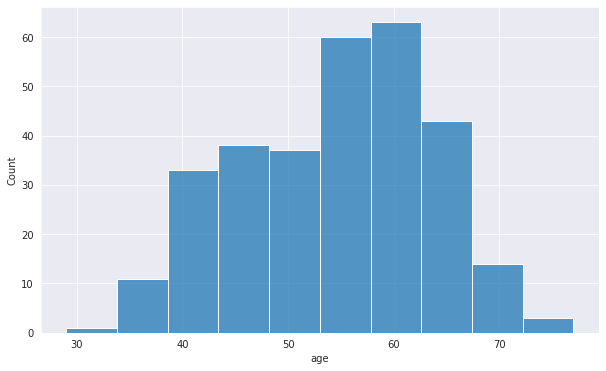

In [5]:
#lets see the age range in a histogram 
plt.figure(figsize=(10,6)) #setting size of the plot
sns.histplot(data=df,x="age",bins=10);

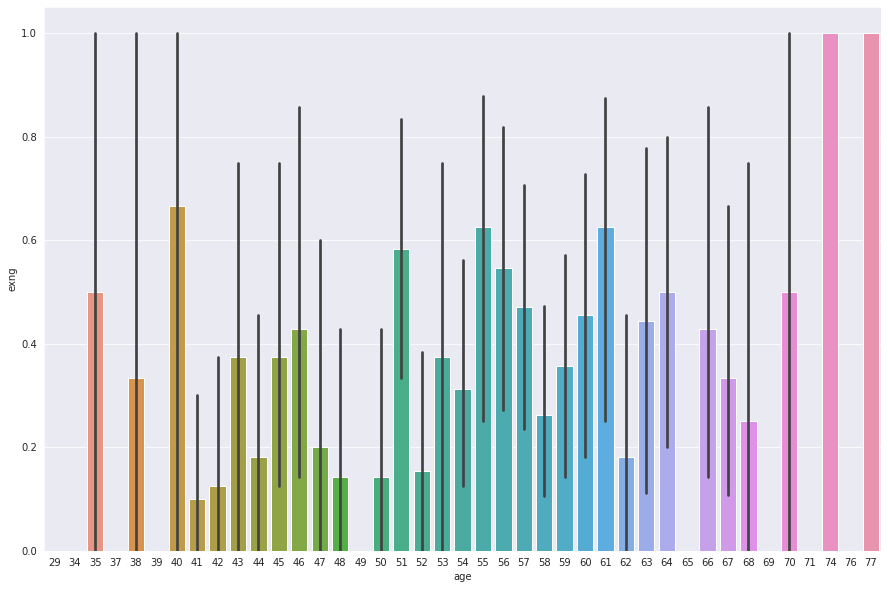

In [6]:
#angina and age
plt.figure(figsize=(15,10)) #setting the plot size
sns.barplot(data=df,x="age",y="exng"); 

we see ages (29 34 37 39 49 65 69 71 76) do not experience angina during exercise. 

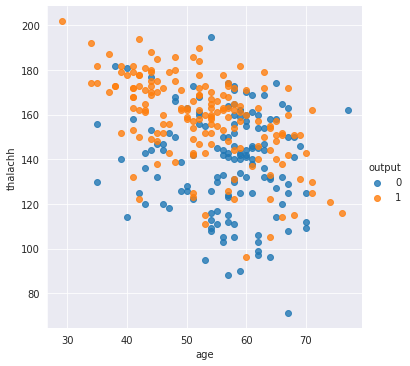

In [7]:
#relation between age and highest heart rate and how likely that patient will have heart attack

sns.lmplot(data=df,x="age",y="thalachh",hue="output",fit_reg=False);

we see that probability of having heart attack increase after the maximum heart rate achieved exceed 120 

## Creating features and Splitting the data

In [8]:
#creat new feature and read an existing feature

#creating a feature
df["c/o"]=df["cp"]/df["thalachh"]

#reading an existing feature
df["sat"] = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv")

In [9]:
#defining the dependant and independant columns

X = df.drop(["output"],axis=1) #independant columns
y = df.output #dependant column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) #splitting the data into train and test 

## Modeling

In [10]:
reg = RandomForestClassifier(n_jobs=-1,n_estimators=40,min_samples_leaf=2,random_state=42,ccp_alpha=0.01) #using random forest as a model

#before i choose this parameters i ran gridsearchcv these are the parameters that worked to save time for you

reg.fit(X_train,y_train) #training the model

RandomForestClassifier(ccp_alpha=0.01, min_samples_leaf=2, n_estimators=40,
                       n_jobs=-1, random_state=42)

## Scoring

In [11]:
print("accuracy score on the training set : ",reg.score(X_train,y_train))
print("accuracy score on the test set : ",reg.score(X_test,y_test))

accuracy score on the training set :  0.9338842975206612
accuracy score on the test set :  0.9016393442622951


In [12]:
print("F1 score on the training set : ",f1_score(y_train,reg.predict(X_train)))
print("F1 score on the test set : ",f1_score(y_test,reg.predict(X_test)))

F1 score on the training set :  0.9402985074626865
F1 score on the test set :  0.90625


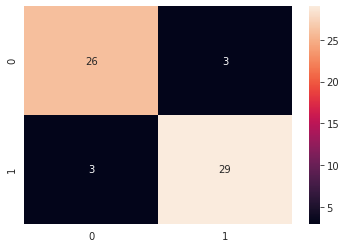

In [13]:
#confusin matrix
pred = reg.predict(X_test)
                   
sns.heatmap(confusion_matrix(y_test,pred),annot=True);

out of 61 example there is only 6 example which got predicted wrong

#### thank you 